In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('laptop_data.csv')

In [3]:
df.shape

(1303, 12)

In [4]:
df.head()

Unnamed: 0 Company   TypeName  Inches                    ScreenResolution  \
0           0   Apple  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   
1           1   Apple  Ultrabook    13.3                            1440x900   
2           2      HP   Notebook    15.6                   Full HD 1920x1080   
3           3   Apple  Ultrabook    15.4  IPS Panel Retina Display 2880x1800   
4           4   Apple  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   

                          Cpu   Ram               Memory  \
0        Intel Core i5 2.3GHz   8GB            128GB SSD   
1        Intel Core i5 1.8GHz   8GB  128GB Flash Storage   
2  Intel Core i5 7200U 2.5GHz   8GB            256GB SSD   
3        Intel Core i7 2.7GHz  16GB            512GB SSD   
4        Intel Core i5 3.1GHz   8GB            256GB SSD   

                            Gpu  OpSys  Weight        Price  
0  Intel Iris Plus Graphics 640  macOS  1.37kg   71378.6832  
1        Intel HD Graphics 6000  macOS  1.34kg   47895.5232  
2         Intel HD Graphics 620  No OS  1.86kg   30636.0000  
3            AMD Radeon Pro 455  macOS  1.83kg  135195.3360  
4  Intel Iris Plus Graphics 650  macOS  1.37kg   96095.8080

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [6]:
df.duplicated().sum()

0

There are no duplicated rows in the dataset.

In [7]:
df.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

There are no rows with missing values.

In [8]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [9]:
df.head()

Company   TypeName  Inches                    ScreenResolution  \
0   Apple  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   
1   Apple  Ultrabook    13.3                            1440x900   
2      HP   Notebook    15.6                   Full HD 1920x1080   
3   Apple  Ultrabook    15.4  IPS Panel Retina Display 2880x1800   
4   Apple  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   

                          Cpu   Ram               Memory  \
0        Intel Core i5 2.3GHz   8GB            128GB SSD   
1        Intel Core i5 1.8GHz   8GB  128GB Flash Storage   
2  Intel Core i5 7200U 2.5GHz   8GB            256GB SSD   
3        Intel Core i7 2.7GHz  16GB            512GB SSD   
4        Intel Core i5 3.1GHz   8GB            256GB SSD   

                            Gpu  OpSys  Weight        Price  
0  Intel Iris Plus Graphics 640  macOS  1.37kg   71378.6832  
1        Intel HD Graphics 6000  macOS  1.34kg   47895.5232  
2         Intel HD Graphics 620  No OS  1.86kg   30636.0000  
3            AMD Radeon Pro 455  macOS  1.83kg  135195.3360  
4  Intel Iris Plus Graphics 650  macOS  1.37kg   96095.8080

### Column preprocessing

In [10]:
df['Ram'] = df['Ram'].str.replace('GB','')

In [11]:
df['Weight'] = df['Weight'].str.replace('kg','')

In [12]:
df.head()

Company   TypeName  Inches                    ScreenResolution  \
0   Apple  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   
1   Apple  Ultrabook    13.3                            1440x900   
2      HP   Notebook    15.6                   Full HD 1920x1080   
3   Apple  Ultrabook    15.4  IPS Panel Retina Display 2880x1800   
4   Apple  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   

                          Cpu Ram               Memory  \
0        Intel Core i5 2.3GHz   8            128GB SSD   
1        Intel Core i5 1.8GHz   8  128GB Flash Storage   
2  Intel Core i5 7200U 2.5GHz   8            256GB SSD   
3        Intel Core i7 2.7GHz  16            512GB SSD   
4        Intel Core i5 3.1GHz   8            256GB SSD   

                            Gpu  OpSys Weight        Price  
0  Intel Iris Plus Graphics 640  macOS   1.37   71378.6832  
1        Intel HD Graphics 6000  macOS   1.34   47895.5232  
2         Intel HD Graphics 620  No OS   1.86   30636.0000  
3            AMD Radeon Pro 455  macOS   1.83  135195.3360  
4  Intel Iris Plus Graphics 650  macOS   1.37   96095.8080

### Changing data types of Ram and Weight column

In [13]:
df['Ram'] = df['Ram'].astype('int32')

In [14]:
df['Weight'] = df['Weight'].astype('float32')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 101.9+ KB


### EDA

<AxesSubplot:xlabel='Price', ylabel='Density'>

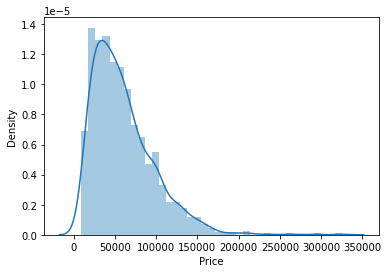

In [16]:
sns.distplot(df['Price'])

<AxesSubplot:>

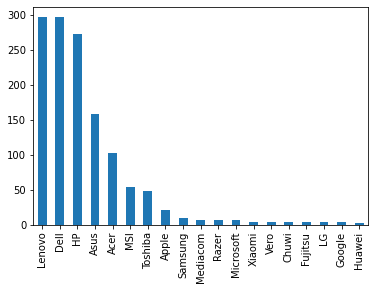

In [17]:
df['Company'].value_counts().plot(kind='bar')

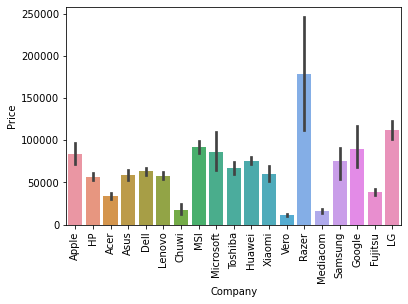

In [18]:
sns.barplot(x=df['Company'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

<AxesSubplot:>

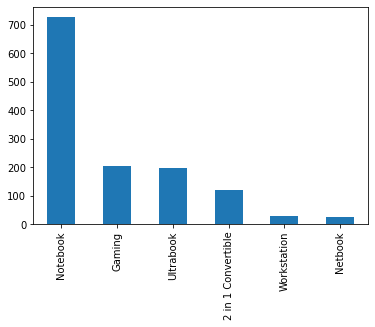

In [19]:
df['TypeName'].value_counts().plot(kind='bar')

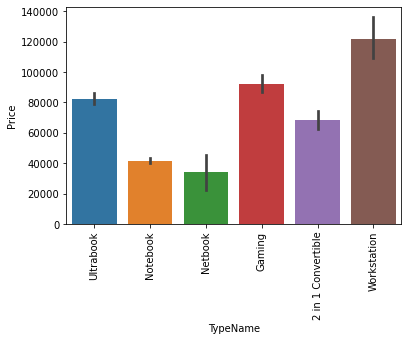

In [20]:
sns.barplot(x=df['TypeName'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

<AxesSubplot:xlabel='Inches', ylabel='Density'>

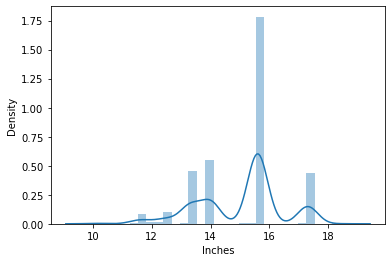

In [21]:
sns.distplot(df['Inches'])

In [22]:
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

In [23]:
df.sample(5)

Company  TypeName  Inches             ScreenResolution  \
691   Lenovo  Notebook    14.0            Full HD 1920x1080   
195       HP  Notebook    17.3  IPS Panel Full HD 1920x1080   
1001      HP  Notebook    13.3  IPS Panel Full HD 1920x1080   
571       HP  Notebook    14.0                     1366x768   
1267    Dell  Notebook    15.6                     1366x768   

                                       Cpu  Ram     Memory  \
691             Intel Core i5 7200U 2.5GHz    4  256GB SSD   
195             Intel Core i5 8250U 1.6GHz    8    1TB HDD   
1001            Intel Core i5 7200U 2.5GHz    8  256GB SSD   
571   Intel Pentium Quad Core N3710 1.6GHz    8    2TB HDD   
1267            Intel Core i7 7500U 2.7GHz    8    1TB HDD   

                        Gpu       OpSys  Weight       Price  Touchscreen  
691   Intel HD Graphics 620  Windows 10    1.70  37242.7200            0  
195    Nvidia GeForce 930MX  Windows 10    2.50  48697.9200            0  
1001  Intel HD Graphics 620  Windows 10    1.34  63349.9200            0  
571   Intel HD Graphics 405  Windows 10    1.94  20725.9200            0  
1267     AMD Radeon R5 M430       Linux    2.30  42943.1472            0

<AxesSubplot:>

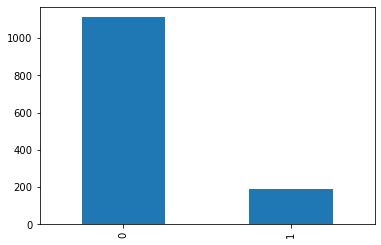

In [24]:
df['Touchscreen'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='Touchscreen', ylabel='Price'>

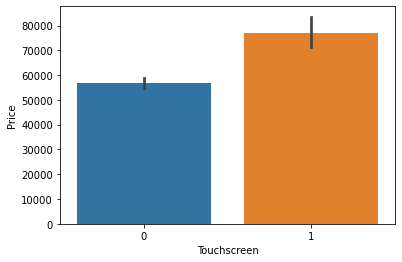

In [25]:
sns.barplot(x=df['Touchscreen'],y=df['Price'])

In [26]:
df['Ips'] = df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

In [27]:
df.sample(5)

Company            TypeName  Inches  \
422       HP            Notebook    15.6   
683       HP            Notebook    17.3   
574   Lenovo            Notebook    15.6   
791     Vero            Notebook    14.0   
1271  Lenovo  2 in 1 Convertible    13.3   

                                ScreenResolution  \
422                            Full HD 1920x1080   
683                  IPS Panel Full HD 1920x1080   
574                            Full HD 1920x1080   
791                                    1920x1080   
1271  IPS Panel Quad HD+ / Touchscreen 3200x1800   

                                       Cpu  Ram              Memory  \
422            Intel Core i7 7820HQ 2.9GHz    8           256GB SSD   
683               Intel Core i3 6006U 2GHz    4           256GB SSD   
574             Intel Core i5 8250U 1.6GHz    4           500GB HDD   
791   Intel Celeron Dual Core N3350 1.1GHz    4  32GB Flash Storage   
1271            Intel Core i7 6500U 2.5GHz   16           512GB SSD   

                        Gpu       OpSys  Weight      Price  Touchscreen  Ips  
422   Intel HD Graphics 630  Windows 10    2.31  76030.560            0    0  
683       AMD Radeon R5 520  Windows 10    2.50  37242.720            0    1  
574   Intel HD Graphics 620  Windows 10    2.05  36496.800            0    0  
791   Intel HD Graphics 500  Windows 10    1.22  10810.512            0    0  
1271  Intel HD Graphics 520  Windows 10    1.30  79866.720            1    1

<AxesSubplot:>

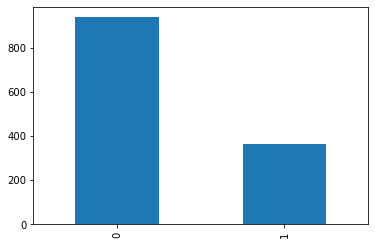

In [28]:
df['Ips'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='Ips', ylabel='Price'>

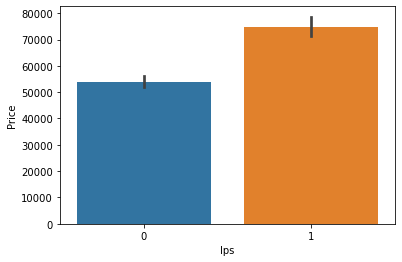

In [29]:
sns.barplot(x=df['Ips'],y=df['Price'])

In [30]:
new = df['ScreenResolution'].str.split('x',n=1,expand=True)

In [31]:
df['X_res'] = new[0]
df['Y_res'] = new[1]

In [32]:
df['X_res'] = df.X_res.apply(lambda x:x.split(' ')[-1])

In [33]:
df.head()

Company   TypeName  Inches                    ScreenResolution  \
0   Apple  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   
1   Apple  Ultrabook    13.3                            1440x900   
2      HP   Notebook    15.6                   Full HD 1920x1080   
3   Apple  Ultrabook    15.4  IPS Panel Retina Display 2880x1800   
4   Apple  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   

                          Cpu  Ram               Memory  \
0        Intel Core i5 2.3GHz    8            128GB SSD   
1        Intel Core i5 1.8GHz    8  128GB Flash Storage   
2  Intel Core i5 7200U 2.5GHz    8            256GB SSD   
3        Intel Core i7 2.7GHz   16            512GB SSD   
4        Intel Core i5 3.1GHz    8            256GB SSD   

                            Gpu  OpSys  Weight        Price  Touchscreen  Ips  \
0  Intel Iris Plus Graphics 640  macOS    1.37   71378.6832            0    1   
1        Intel HD Graphics 6000  macOS    1.34   47895.5232            0    0   
2         Intel HD Graphics 620  No OS    1.86   30636.0000            0    0   
3            AMD Radeon Pro 455  macOS    1.83  135195.3360            0    1   
4  Intel Iris Plus Graphics 650  macOS    1.37   96095.8080            0    1   

  X_res Y_res  
0  2560  1600  
1  1440   900  
2  1920  1080  
3  2880  1800  
4  2560  1600

In [34]:
df['X_res'] = df['X_res'].astype('int32')
df['Y_res'] = df['Y_res'].astype('int32')

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  Ips               1303 non-null   int64  
 13  X_res             1303 non-null   int32  
 14  Y_res             1303 non-null   int32  
dtypes: float32(1), float64(2), int32(3), int64(2), object(7)
memory usage: 132.5+ KB


In [36]:
df.corr()['Price']

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
Ips            0.252208
X_res          0.556529
Y_res          0.552809
Name: Price, dtype: float64

### Creating new column ppi

In [37]:
df['ppi'] = (((df['X_res']**2) + (df['Y_res']**2))**0.5/df['Inches']).astype('float')

In [38]:
df.head()

Company   TypeName  Inches                    ScreenResolution  \
0   Apple  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   
1   Apple  Ultrabook    13.3                            1440x900   
2      HP   Notebook    15.6                   Full HD 1920x1080   
3   Apple  Ultrabook    15.4  IPS Panel Retina Display 2880x1800   
4   Apple  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   

                          Cpu  Ram               Memory  \
0        Intel Core i5 2.3GHz    8            128GB SSD   
1        Intel Core i5 1.8GHz    8  128GB Flash Storage   
2  Intel Core i5 7200U 2.5GHz    8            256GB SSD   
3        Intel Core i7 2.7GHz   16            512GB SSD   
4        Intel Core i5 3.1GHz    8            256GB SSD   

                            Gpu  OpSys  Weight        Price  Touchscreen  Ips  \
0  Intel Iris Plus Graphics 640  macOS    1.37   71378.6832            0    1   
1        Intel HD Graphics 6000  macOS    1.34   47895.5232            0    0   
2         Intel HD Graphics 620  No OS    1.86   30636.0000            0    0   
3            AMD Radeon Pro 455  macOS    1.83  135195.3360            0    1   
4  Intel Iris Plus Graphics 650  macOS    1.37   96095.8080            0    1   

   X_res  Y_res         ppi  
0   2560   1600  226.983005  
1   1440    900  127.677940  
2   1920   1080  141.211998  
3   2880   1800  220.534624  
4   2560   1600  226.983005

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  Ips               1303 non-null   int64  
 13  X_res             1303 non-null   int32  
 14  Y_res             1303 non-null   int32  
 15  ppi               1303 non-null   float64
dtypes: float32(1), float64(3), int32(3), int64

In [40]:
df.corr()['Price']

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
Ips            0.252208
X_res          0.556529
Y_res          0.552809
ppi            0.473487
Name: Price, dtype: float64

In [41]:
df.drop(columns=['Inches','ScreenResolution','X_res','Y_res'],inplace=True)

In [42]:
df.head()

Company   TypeName                         Cpu  Ram               Memory  \
0   Apple  Ultrabook        Intel Core i5 2.3GHz    8            128GB SSD   
1   Apple  Ultrabook        Intel Core i5 1.8GHz    8  128GB Flash Storage   
2      HP   Notebook  Intel Core i5 7200U 2.5GHz    8            256GB SSD   
3   Apple  Ultrabook        Intel Core i7 2.7GHz   16            512GB SSD   
4   Apple  Ultrabook        Intel Core i5 3.1GHz    8            256GB SSD   

                            Gpu  OpSys  Weight        Price  Touchscreen  Ips  \
0  Intel Iris Plus Graphics 640  macOS    1.37   71378.6832            0    1   
1        Intel HD Graphics 6000  macOS    1.34   47895.5232            0    0   
2         Intel HD Graphics 620  No OS    1.86   30636.0000            0    0   
3            AMD Radeon Pro 455  macOS    1.83  135195.3360            0    1   
4  Intel Iris Plus Graphics 650  macOS    1.37   96095.8080            0    1   

          ppi  
0  226.983005  
1  127.677940  
2  141.211998  
3  220.534624  
4  226.983005

In [43]:
df['Cpu Name'] = df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

In [44]:
df.head()

Company   TypeName                         Cpu  Ram               Memory  \
0   Apple  Ultrabook        Intel Core i5 2.3GHz    8            128GB SSD   
1   Apple  Ultrabook        Intel Core i5 1.8GHz    8  128GB Flash Storage   
2      HP   Notebook  Intel Core i5 7200U 2.5GHz    8            256GB SSD   
3   Apple  Ultrabook        Intel Core i7 2.7GHz   16            512GB SSD   
4   Apple  Ultrabook        Intel Core i5 3.1GHz    8            256GB SSD   

                            Gpu  OpSys  Weight        Price  Touchscreen  Ips  \
0  Intel Iris Plus Graphics 640  macOS    1.37   71378.6832            0    1   
1        Intel HD Graphics 6000  macOS    1.34   47895.5232            0    0   
2         Intel HD Graphics 620  No OS    1.86   30636.0000            0    0   
3            AMD Radeon Pro 455  macOS    1.83  135195.3360            0    1   
4  Intel Iris Plus Graphics 650  macOS    1.37   96095.8080            0    1   

          ppi       Cpu Name  
0  226.983005  Intel Core i5  
1  127.677940  Intel Core i5  
2  141.211998  Intel Core i5  
3  220.534624  Intel Core i7  
4  226.983005  Intel Core i5

In [45]:
def fetch_processor(text):
    
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    elif text.split()[0] == 'Intel':
        return 'Other Intel Processor'
    else:
        return 'AMD Processor'
    

### CPU column preprocessing

In [46]:
df['Cpu Brand'] = df['Cpu Name'].apply(fetch_processor)

In [47]:
df.sample(5)

Company            TypeName                          Cpu  Ram  \
501       HP            Notebook   Intel Core i5 7200U 2.5GHz    8   
1194    Dell  2 in 1 Convertible   Intel Core i5 7200U 2.5GHz    8   
41      Dell              Gaming  Intel Core i7 7700HQ 2.8GHz   16   
181     Dell           Ultrabook   Intel Core i5 8250U 1.6GHz    8   
460     Acer            Notebook     Intel Core i3 6006U 2GHz    4   

                    Memory                      Gpu       OpSys  Weight  \
501              256GB SSD           AMD Radeon 520  Windows 10    1.91   
1194             256GB SSD    Intel HD Graphics 620  Windows 10    1.60   
41    256GB SSD +  1TB HDD  Nvidia GeForce GTX 1060  Windows 10    2.65   
181              256GB SSD   Intel UHD Graphics 620  Windows 10    1.23   
460                1TB HDD     Nvidia GeForce 940MX  Windows 10    2.23   

           Price  Touchscreen  Ips         ppi       Cpu Name      Cpu Brand  
501   32979.7872            0    0  100.454670  Intel Core i5  Intel Core i5  
1194  63882.7200            1    1  165.632118  Intel Core i5  Intel Core i5  
41    79866.7200            0    1  141.211998  Intel Core i7  Intel Core i7  
181   74538.7200            0    0  165.632118  Intel Core i5  Intel Core i5  
460   28984.3200            0    0  141.211998  Intel Core i3  Intel Core i3

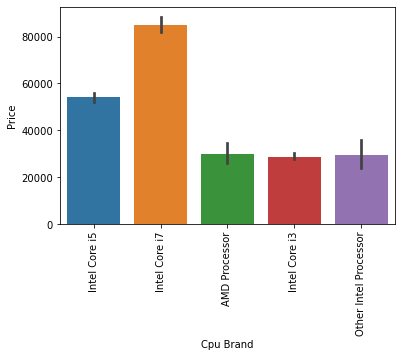

In [48]:
sns.barplot(x=df['Cpu Brand'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [49]:
df.drop(columns=['Cpu','Cpu Name'],inplace=True)

<AxesSubplot:>

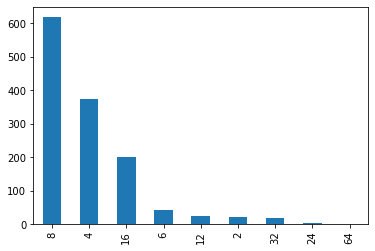

In [50]:
df['Ram'].value_counts().plot(kind='bar')

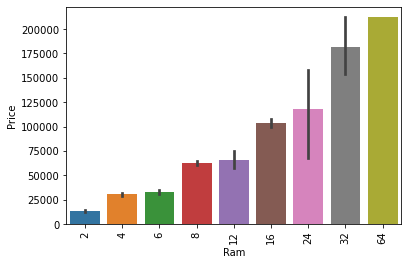

In [51]:
sns.barplot(x=df['Ram'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

### Memory column preprocessing

In [52]:
df['Memory'].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
256GB SSD +  500GB HDD             2
256GB SSD +  256GB SSD             2
128GB SSD +  2TB HDD               2
1TB SSD +  1TB HDD                 2
128GB HDD                          1
1

In [53]:
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
df["Memory"] = df["Memory"].str.replace('GB', '')
df["Memory"] = df["Memory"].str.replace('TB', '000')
new = df["Memory"].str.split("+", n = 1, expand = True)

df["first"]= new[0]
df["first"]=df["first"].str.strip()

df["second"]= new[1]

df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['first'] = df['first'].str.replace(r'\D', '')

df["second"].fillna("0", inplace = True)

df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['second'] = df['second'].str.replace(r'\D', '')

df["first"] = df["first"].astype(int)
df["second"] = df["second"].astype(int)

df["HDD"]=(df["first"]*df["Layer1HDD"]+df["second"]*df["Layer2HDD"])
df["SSD"]=(df["first"]*df["Layer1SSD"]+df["second"]*df["Layer2SSD"])
df["Hybrid"]=(df["first"]*df["Layer1Hybrid"]+df["second"]*df["Layer2Hybrid"])
df["Flash_Storage"]=(df["first"]*df["Layer1Flash_Storage"]+df["second"]*df["Layer2Flash_Storage"])

In [54]:
df.head()

Company   TypeName  Ram             Memory                           Gpu  \
0   Apple  Ultrabook    8            128 SSD  Intel Iris Plus Graphics 640   
1   Apple  Ultrabook    8  128 Flash Storage        Intel HD Graphics 6000   
2      HP   Notebook    8            256 SSD         Intel HD Graphics 620   
3   Apple  Ultrabook   16            512 SSD            AMD Radeon Pro 455   
4   Apple  Ultrabook    8            256 SSD  Intel Iris Plus Graphics 650   

   OpSys  Weight        Price  Touchscreen  Ips  ...  Layer1Hybrid  \
0  macOS    1.37   71378.6832            0    1  ...             0   
1  macOS    1.34   47895.5232            0    0  ...             0   
2  No OS    1.86   30636.0000            0    0  ...             0   
3  macOS    1.83  135195.3360            0    1  ...             0   
4  macOS    1.37   96095.8080            0    1  ...             0   

  Layer1Flash_Storage  Layer2HDD  Layer2SSD  Layer2Hybrid  \
0                   0          0          0             0   
1                   1          0          0             0   
2                   0          0          0             0   
3                   0          0          0             0   
4                   0          0          0             0   

   Layer2Flash_Storage  HDD  SSD  Hybrid  Flash_Storage  
0                    0    0  128       0              0  
1                    0    0    0       0            128  
2                    0    0  256       0              0  
3                    0    0  512       0              0  
4                    0    0  256       0              0  

[5 rows x 26 columns]

In [55]:
df.drop(columns=['Memory'],inplace=True)

In [56]:
df.head()

Company   TypeName  Ram                           Gpu  OpSys  Weight  \
0   Apple  Ultrabook    8  Intel Iris Plus Graphics 640  macOS    1.37   
1   Apple  Ultrabook    8        Intel HD Graphics 6000  macOS    1.34   
2      HP   Notebook    8         Intel HD Graphics 620  No OS    1.86   
3   Apple  Ultrabook   16            AMD Radeon Pro 455  macOS    1.83   
4   Apple  Ultrabook    8  Intel Iris Plus Graphics 650  macOS    1.37   

         Price  Touchscreen  Ips         ppi  ... Layer1Hybrid  \
0   71378.6832            0    1  226.983005  ...            0   
1   47895.5232            0    0  127.677940  ...            0   
2   30636.0000            0    0  141.211998  ...            0   
3  135195.3360            0    1  220.534624  ...            0   
4   96095.8080            0    1  226.983005  ...            0   

   Layer1Flash_Storage  Layer2HDD  Layer2SSD  Layer2Hybrid  \
0                    0          0          0             0   
1                    1          0          0             0   
2                    0          0          0             0   
3                    0          0          0             0   
4                    0          0          0             0   

   Layer2Flash_Storage  HDD  SSD  Hybrid  Flash_Storage  
0                    0    0  128       0              0  
1                    0    0    0       0            128  
2                    0    0  256       0              0  
3                    0    0  512       0              0  
4                    0    0  256       0              0  

[5 rows x 25 columns]

In [57]:
df.corr()['Price']

Ram                    0.743007
Weight                 0.210370
Price                  1.000000
Touchscreen            0.191226
Ips                    0.252208
ppi                    0.473487
first                 -0.122365
second                 0.295004
Layer1HDD             -0.426121
Layer1SSD              0.513609
Layer1Hybrid          -0.039386
Layer1Flash_Storage   -0.210823
Layer2HDD              0.298374
Layer2SSD              0.023611
Layer2Hybrid           0.105004
Layer2Flash_Storage         NaN
HDD                   -0.096441
SSD                    0.670799
Hybrid                 0.007989
Flash_Storage         -0.040511
Name: Price, dtype: float64

### Dropping column with less correlation with respect to price.

In [58]:
df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage','Hybrid','Flash_Storage'],inplace=True)

In [59]:
df.head()

Company   TypeName  Ram                           Gpu  OpSys  Weight  \
0   Apple  Ultrabook    8  Intel Iris Plus Graphics 640  macOS    1.37   
1   Apple  Ultrabook    8        Intel HD Graphics 6000  macOS    1.34   
2      HP   Notebook    8         Intel HD Graphics 620  No OS    1.86   
3   Apple  Ultrabook   16            AMD Radeon Pro 455  macOS    1.83   
4   Apple  Ultrabook    8  Intel Iris Plus Graphics 650  macOS    1.37   

         Price  Touchscreen  Ips         ppi      Cpu Brand  HDD  SSD  
0   71378.6832            0    1  226.983005  Intel Core i5    0  128  
1   47895.5232            0    0  127.677940  Intel Core i5    0    0  
2   30636.0000            0    0  141.211998  Intel Core i5    0  256  
3  135195.3360            0    1  220.534624  Intel Core i7    0  512  
4   96095.8080            0    1  226.983005  Intel Core i5    0  256

### GPU column preprocessing

In [60]:
df['Gpu'].value_counts()

Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
Nvidia Quadro 3000M          1
AMD Radeon R5 M315           1
AMD Radeon R5 430            1
Nvidia Quadro M620M          1
AMD Radeon R5 520            1
Name: Gpu, Length: 110, dtype: int64

In [61]:
df['Gpu Brand'] = df['Gpu'].apply(lambda x:x.split()[0])

In [62]:
df['Gpu Brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
ARM         1
Name: Gpu Brand, dtype: int64

In [63]:
df = df[df['Gpu Brand']!='ARM']

In [64]:
df['Gpu Brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
Name: Gpu Brand, dtype: int64

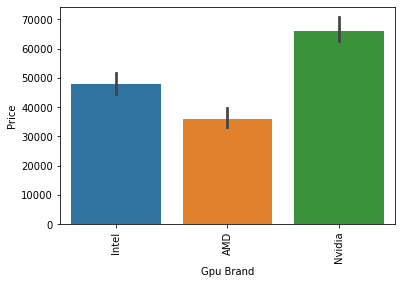

In [65]:
sns.barplot(x=df['Gpu Brand'],y=df['Price'],estimator=np.median)
plt.xticks(rotation='vertical')
plt.show()

In [66]:
df.drop(columns=['Gpu'],inplace=True)

In [67]:
df.head()

Company   TypeName  Ram  OpSys  Weight        Price  Touchscreen  Ips  \
0   Apple  Ultrabook    8  macOS    1.37   71378.6832            0    1   
1   Apple  Ultrabook    8  macOS    1.34   47895.5232            0    0   
2      HP   Notebook    8  No OS    1.86   30636.0000            0    0   
3   Apple  Ultrabook   16  macOS    1.83  135195.3360            0    1   
4   Apple  Ultrabook    8  macOS    1.37   96095.8080            0    1   

          ppi      Cpu Brand  HDD  SSD Gpu Brand  
0  226.983005  Intel Core i5    0  128     Intel  
1  127.677940  Intel Core i5    0    0     Intel  
2  141.211998  Intel Core i5    0  256     Intel  
3  220.534624  Intel Core i7    0  512       AMD  
4  226.983005  Intel Core i5    0  256     Intel

In [68]:
df['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Windows 10 S       8
Mac OS X           8
Android            2
Name: OpSys, dtype: int64

### Operating system column preprocessing

In [69]:
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

In [70]:
df['os'] = df['OpSys'].apply(cat_os)

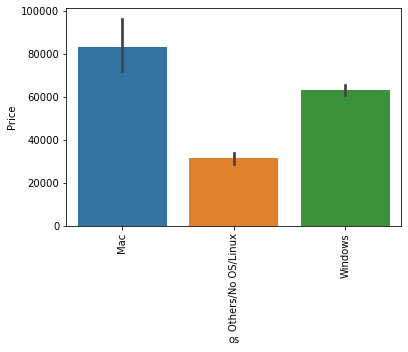

In [71]:
sns.barplot(x=df['os'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [72]:
df.drop(columns=['OpSys'],inplace=True)

In [73]:
df['os'].value_counts()

Windows               1125
Others/No OS/Linux     156
Mac                     21
Name: os, dtype: int64

In [74]:
df.head()

Company   TypeName  Ram  Weight        Price  Touchscreen  Ips         ppi  \
0   Apple  Ultrabook    8    1.37   71378.6832            0    1  226.983005   
1   Apple  Ultrabook    8    1.34   47895.5232            0    0  127.677940   
2      HP   Notebook    8    1.86   30636.0000            0    0  141.211998   
3   Apple  Ultrabook   16    1.83  135195.3360            0    1  220.534624   
4   Apple  Ultrabook    8    1.37   96095.8080            0    1  226.983005   

       Cpu Brand  HDD  SSD Gpu Brand                  os  
0  Intel Core i5    0  128     Intel                 Mac  
1  Intel Core i5    0    0     Intel                 Mac  
2  Intel Core i5    0  256     Intel  Others/No OS/Linux  
3  Intel Core i7    0  512       AMD                 Mac  
4  Intel Core i5    0  256     Intel                 Mac

In [75]:
df.corr()['Price']

Ram            0.742905
Weight         0.209867
Price          1.000000
Touchscreen    0.192917
Ips            0.253320
ppi            0.475368
HDD           -0.096891
SSD            0.670660
Name: Price, dtype: float64

<AxesSubplot:xlabel='Price', ylabel='Density'>

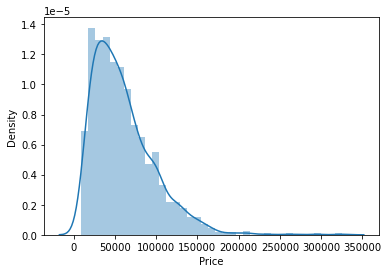

In [76]:
sns.distplot(df['Price'])

<AxesSubplot:xlabel='Price', ylabel='Density'>

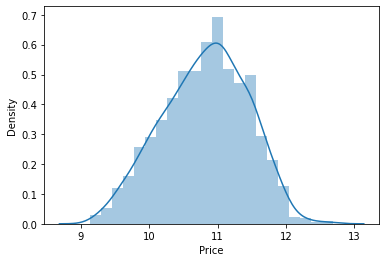

In [77]:
sns.distplot(np.log(df['Price']))

In [78]:
x=df.drop(columns=['Price'])
y=np.log(df['Price'])

### Model Building

In [79]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.15,random_state=2)

In [80]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error

from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [81]:
x_train

Company            TypeName  Ram  Weight  Touchscreen  Ips         ppi  \
183   Toshiba            Notebook    8    2.00            0    0  100.454670   
1141      MSI              Gaming    8    2.40            0    0  141.211998   
1049     Asus             Netbook    4    1.20            0    0  135.094211   
1020     Dell  2 in 1 Convertible    4    2.08            1    1  141.211998   
878      Dell            Notebook    4    2.18            0    0  141.211998   
...       ...                 ...  ...     ...          ...  ...         ...   
466      Acer            Notebook    4    2.20            0    0  100.454670   
299      Asus           Ultrabook   16    1.63            0    0  141.211998   
493      Acer            Notebook    8    2.20            0    0  100.454670   
527    Lenovo            Notebook    8    2.20            0    0  100.454670   
1193    Apple           Ultrabook    8    0.92            0    1  226.415547   

                  Cpu Brand   HDD  SSD Gpu Brand                  os  
183           Intel Core i5     0  128     Intel             Windows  
1141          Intel Core i7  1000  128    Nvidia             Windows  
1049  Other Intel Processor     0    0     Intel  Others/No OS/Linux  
1020          Intel Core i3  1000    0     Intel             Windows  
878           Intel Core i5  1000  128    Nvidia             Windows  
...                     ...   ...  ...       ...                 ...  
466           Intel Core i3   500    0    Nvidia             Windows  
299           Intel Core i7     0  512    Nvidia             Windows  
493           AMD Processor  1000    0       AMD             Windows  
527           Intel Core i3  2000    0    Nvidia  Others/No OS/Linux  
1193  Other Intel Processor     0    0     Intel                 Mac  

[1106 rows x 12 columns]

### Linear Regression

In [82]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = LinearRegression()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8073277448418711
MAE 0.21017827976428213


### Ridge Regression

In [83]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = Ridge(alpha=10)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.81273310313118
MAE 0.20926802242583054


### Lasso Regression

In [84]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = Lasso(alpha=0.001)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8071853945317105
MAE 0.21114361613472565


### KNN

In [85]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = KNeighborsRegressor(n_neighbors=3)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.803148868705085
MAE 0.19264883332948868


### Random Forest

In [86]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8873402378382488
MAE 0.15860130110457718


### Decision Tree

In [87]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = DecisionTreeRegressor(max_depth=8)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8504719172419258
MAE 0.17795101898313403


### SVM

In [88]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = SVR(kernel='rbf',C=10000,epsilon=0.1)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.808318090228966
MAE 0.20239059427193437


### AdaBoost

In [89]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = AdaBoostRegressor(n_estimators=15,learning_rate=1.0)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.7820751088784414
MAE 0.2334210176158329


### Gradient Boost

In [90]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = GradientBoostingRegressor(n_estimators=500)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8818679776363585
MAE 0.15977167742657414


### XGBoost

In [91]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = XGBRegressor(n_estimators=45,max_depth=5,learning_rate=0.5)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8811773435850243
MAE 0.16496203512600974


### Voting Regressor

In [98]:
from sklearn.ensemble import VotingRegressor,StackingRegressor

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')


rf = RandomForestRegressor(n_estimators=350,random_state=3,max_samples=None,max_features=0.75,max_depth=15)
gbdt = GradientBoostingRegressor(n_estimators=100,max_features=0.5)
xgb = XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5)
et = ExtraTreesRegressor(n_estimators=100,random_state=3,max_samples=None,max_features=0.75,max_depth=10)

step2 = VotingRegressor([('rf', rf), ('gbdt', gbdt), ('xgb',xgb), ('et',et)],weights=[5,1,1,1])

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8907927719328166
MAE 0.15690071928700358


### Stacking

In [97]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')


estimators = [
    ('rf', RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)),
    ('gbdt',GradientBoostingRegressor(n_estimators=100,max_features=0.5)),
    ('xgb', XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5))
]

step2 = StackingRegressor(estimators=estimators, final_estimator=Ridge(alpha=100))

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8814850240885536
MAE 0.16632417054445597


In [99]:
df

Company            TypeName  Ram  Weight        Price  Touchscreen  Ips  \
0      Apple           Ultrabook    8    1.37   71378.6832            0    1   
1      Apple           Ultrabook    8    1.34   47895.5232            0    0   
2         HP            Notebook    8    1.86   30636.0000            0    0   
3      Apple           Ultrabook   16    1.83  135195.3360            0    1   
4      Apple           Ultrabook    8    1.37   96095.8080            0    1   
...      ...                 ...  ...     ...          ...          ...  ...   
1298  Lenovo  2 in 1 Convertible    4    1.80   33992.6400            1    1   
1299  Lenovo  2 in 1 Convertible   16    1.30   79866.7200            1    1   
1300  Lenovo            Notebook    2    1.50   12201.1200            0    0   
1301      HP            Notebook    6    2.19   40705.9200            0    0   
1302    Asus            Notebook    4    2.20   19660.3200            0    0   

             ppi              Cpu Brand   HDD  SSD Gpu Brand  \
0     226.983005          Intel Core i5     0  128     Intel   
1     127.677940          Intel Core i5     0    0     Intel   
2     141.211998          Intel Core i5     0  256     Intel   
3     220.534624          Intel Core i7     0  512       AMD   
4     226.983005          Intel Core i5     0  256     Intel   
...          ...                    ...   ...  ...       ...   
1298  157.350512          Intel Core i7     0  128     Intel   
1299  276.053530          Intel Core i7     0  512     Intel   
1300  111.935204  Other Intel Processor     0    0     Intel   
1301  100.454670          Intel Core i7  1000    0       AMD   
1302  100.454670  Other Intel Processor   500    0     Intel   

                      os  
0                    Mac  
1                    Mac  
2     Others/No OS/Linux  
3                    Mac  
4                    Mac  
...                  ...  
1298             Windows  
1299             Windows  
1300             Windows  
1301             Windows  
1302             Windows  

[1302 rows x 13 columns]

Since Voting Regressor model gave us good R2 score we will choose the same.

In [100]:
import pickle

In [101]:
pickle.dump(df,open("df.pkl","wb"))
pickle.dump(pipe,open("pipe.pkl","wb"))